已获取有实时价格的数据10条
已获取有实时价格的数据20条
已获取有实时价格的数据30条
已获取有实时价格的数据40条
已获取有实时价格的数据50条
已获取有实时价格的数据60条
已获取有实时价格的数据70条
已获取有实时价格的数据80条
已获取有实时价格的数据90条
已获取有实时价格的数据100条
已获取有实时价格的数据110条
已获取有实时价格的数据120条
已获取有实时价格的数据一共121条，有往期价格的数据一共12条，价格暂定的数据一共35条
           楼盘名    区县                          地址     价格
0       智骏一方天下   开发区  开发区@新能源汽车科技城唐龙大道东侧(赣州职业...   7200
1         新力东园    赣县           赣县@贡江北大道与狮子岩大道交汇处   7300
2        富力现代城  蓉江新区     蓉江新区@蓉江新区武陵大桥与新世纪大桥间沿江带  13000
3    绿地赣州城际空间站   开发区                   开发区@高铁西站旁   8300
4      美的·君兰半岛   开发区           开发区@东江源大道与香江大道交会处  11000
..         ...   ...                         ...    ...
116     城市商业广场    南康   南康@赣南大道与市场东路交会处(花香美林郡旁...   6200
117      盈海家博城    南康             南康@迎宾大道与市场东路交汇处  18000
118      家具新中心    南康   南康@第一大道与金泰大道交汇处(南康区·北方...  20000
119  佳兴·家居建材广场    南康                     南康@文峰大道  13000
120      赣州灯饰城    南康   南康@江西省赣州市南康区龙岭西区(赣粤高速出...  18000

[121 rows x 4 columns]


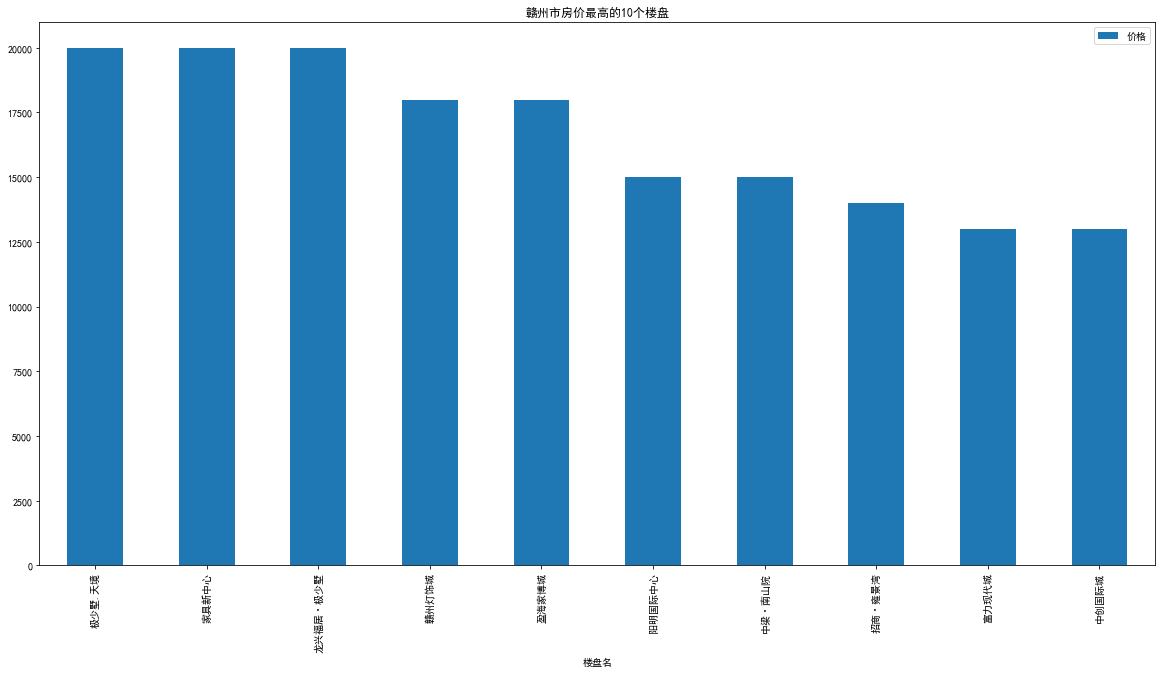

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    'city':['Beijing','Beijing','Shanghai','Shanghai','Shenzhen','Shenzhen','Guangzhou','Guangzhou'],
    'year':[2018,2019,2018,2019,2018,2019,2018,2019],
    'index':[2,2.1,1.6,1.8,2.3,1.9,1.8,1.7]}
frame = pd.DataFrame(data)
frame

import requests as re
from bs4 import BeautifulSoup
import pandas as pd

# 定义一个用pandas写入csv文件的函数
def dateframe_to_csv(list):
    """
    用pandas创建DateFrame，然后写入csv文件
    """
    name_list = []
    district_list = []
    address_list = []
    price_list = []

    for line in list:
        if list.index(line) % 2 == 0:
            name_list.append(line[0])
            district_list.append(line[1])
            address_list.append(line[2])
        else:
            price_list.append(line)
            
    newhouse_dict = {'楼盘名': name_list, '区县': district_list, '地址': address_list, '价格': price_list}
    df = pd.DataFrame(newhouse_dict)
    df.to_csv('ganzhou_newhouse_current_price.csv', index=False, mode='w', encoding='GBK')
    return df

def main():
    """
    主函数
    """
    # 初始化有具体价格、往期价格、价格暂定的三个列表    
    have_cur_price_list = []                           # 楼盘有实时价格
    have_pre_price_list = []                           # 楼盘有往期价格
    have_no_price_list = []                            # 楼盘价格待定，且无往期价格供参考

    # 分别统计数量，完成爬取后输出信息
    is_cur_price_num = 0    # 有实时价格的的楼盘数量
    is_pre_price_num = 0    # 无实时但有往期价格的楼盘数量
    is_no_price_num = 0     # 价格待定的楼盘数量

    # 爬取数据
    for i in range(1, 10):
        url = "http://ganzhou.newhouse.fang.com/house/s/b9"+str(i)+"/"

        html = re.get(url, timeout=30)
        html.encoding = 'GBK'  # 解决中文乱码问题
        soup = BeautifulSoup(html.text, 'lxml')
        nlc_details = soup.find_all('div',class_='nlc_details')


        for detail in nlc_details:
            str_detail = str(detail)
            #保证price有具体值，可以实时获取
            if str_detail.find('元/㎡') != -1:          # 在字符串中查找子字符串，如果找到返回索引值，如果找不到返回-1
                if str_detail.find('价格待定') == -1:


                    name = detail.find('div',{'class':'nlcd_name'}).text.strip()

                    #为便于后面分组统计，把地址信息再拆分为”区县”+“详细地址”两条信息，定义一个新变量district接收区县数据

                    address = detail.find('div',{'class':'address'}).text.strip().replace('\t','').replace('[','').replace(']','@')
                    list = address.split('@')
                    district = list[0]
                    have_cur_price_list.append([name, district, address])
                    Price = detail.find('div', {'class': 'nhouse_price'})
                    for price in Price.select('span'):
                        have_cur_price_list.append(price.get_text())
                    is_cur_price_num += 1
                    if is_cur_price_num % 10 == 0:
                        print('已获取有实时价格的数据{}条'.format(is_cur_price_num))

                else:
                    price = detail.find('div',{'class':'nhouse_price'}).text.strip()
                    name = detail.find('div',{'class':'nlcd_name'}).text.strip()
                    address = detail.find('div',{'class':'address'}).text.strip().replace('\t','').replace('[','').replace(']','@')
                    list = address.split('@')
                    district = list[0]
                    have_pre_price_list.append([name, district, address, price])
                    is_pre_price_num += 1
            else:
                    price = detail.find('div',{'class':'nhouse_price'}).text.strip()
                    name = detail.find('div',{'class':'nlcd_name'}).text.strip()
                    address = detail.find('div',{'class':'address'}).text.strip().replace('\t','').replace('[','').replace(']','@')
                    list = address.split('@')
                    district = list[0]
                    have_no_price_list.append([name, district, address, price])
                    is_no_price_num += 1

    # 输出爬取信息的统计结果
    print('已获取有实时价格的数据一共{}条，有往期价格的数据一共{}条，价格暂定的数据一共{}条'.format(is_cur_price_num,is_pre_price_num,is_no_price_num))

    # 调用dateframe_to_csv函数
    newhouse_price_data = dateframe_to_csv(have_cur_price_list)
    print(newhouse_price_data)

if __name__ == '__main__':
    main()
    
plt.rcParams['font.sans-serif'] = ['SimHei']    #可输出中文
plt.rcParams['axes.unicode_minus'] = False      #可处理负数
newhouse_price_data = pd.read_csv('ganzhou_newhouse_current_price.csv',encoding='GBK') 
newhouse_price_data.drop([105, 108],axis=0,inplace=True)                  
top10_communities = newhouse_price_data.sort_values(by = ['价格'],ascending= False).head(10)                          #dataframe.sort_values(by=[],ascending=[]),by参数表示按哪一列的值排序，ascending参数默认值为True，即升序，这里是降序排序，所以要设置参数为'False',head()见上。
top10_communities.plot(kind = 'bar',x ='楼盘名' ,y ='价格',title = '赣州市房价最高的10个楼盘' ,figsize = (20,10))       #pandas的dataframe可以直接调用matplotlib的plot函数，kind参数表示图表类型，bar是柱状图，x、y轴设置为列名使用该列的值，title表示图表标题，figsize表示图表尺寸大小。
plt.savefig('top10_communities_bar.jpg')                   
